In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import datasets  
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import scipy.spatial
from collections import Counter

def euclidean_distance(a, b, keepdims=False):
    return np.sqrt(np.sum(np.square(a-b)))

class KNN(BaseEstimator, ClassifierMixin):
    def __init__(self, k=5, dist_function=euclidean_distance):
        super(KNN, self).__init__()

        self.k = k
        self.dist_function = dist_function
        self.train_points = None

    def fit(self, X, y):
        # TODO:
        self.X_train = X
        self.Y_train = y

    def score(self, X_test, Y_test):
       predictions = self.predict(X_test)
       return (predictions == Y_test).sum() / len(Y_test)

    def predict(self, X_test):
        #TODO:
        final_output = []
        for i in range(len(X_test)):
          d = []
          v = []
          for j in range(len(X_train)):
            dist = euclidean_distance(X_train[j] , X_test[i])
            d.append([dist, j])
          d.sort()
          d = d[0:self.k]
          for d, j in d:
            v.append(Y_train[j])
          ans = Counter(v).most_common(1)[0][0]
          final_output.append(ans)
        return final_output


        raise NotImplementedError
        

# Generate toy data (two moons dataset)
# Please don't modify this part for this exercise
n = 200
X, Y = datasets.make_moons(n, noise=0.25, random_state=1234)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=12345)
# From now on you can modify stuff again

classifiers = [(KNN(k), f'KNN ($k={k}$)') for k in [1, 2, 5, 10, 15, 20]]
preds = []
scores = []
for i in [1, 2, 5, 10, 15, 20]:
  clf = KNN(i)
  clf.fit(X_train, Y_train)
  score = clf.score(X_test, Y_test)
  scores.append(score)
  prediction = clf.predict(X_test)
  preds.append(prediction)

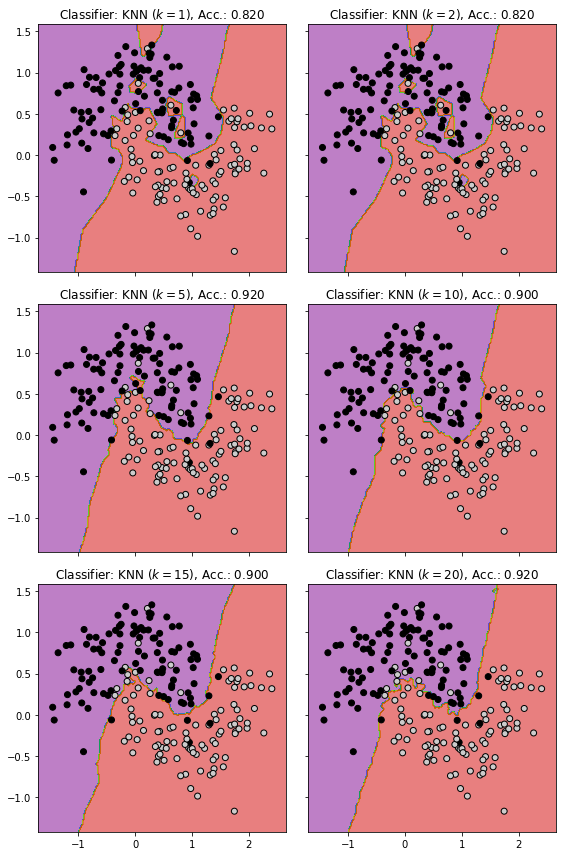

In [ ]:
import matplotlib
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
res = 200  # Resolution of the grid in cells
x_max, y_max = np.max(X, axis=0) + 0.25
x_min, y_min = np.min(X, axis=0) - 0.25
grid_x, grid_y = np.meshgrid(np.linspace(x_min, x_max, res),
                             np.linspace(y_min, y_max, res))
# Get test array from grid
grid_input = np.c_[grid_x.reshape(-1), grid_y.reshape(-1)]

rows = (len(classifiers) + 1) // 2
fig, axes = plt.subplots(rows, 2, sharex=True, sharey=True, figsize=(8, 4*rows))
for (clf, name), ax in zip(classifiers, axes.ravel()):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    grid_out = np.array(clf.predict(grid_input)).reshape(grid_x.shape)

    ax.set_title(f'Classifier: {name}, Acc.: {score:.3f}')
    ax.contourf(grid_x, grid_y, grid_out, alpha=0.5, cmap='nipy_spectral')
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap='nipy_spectral', edgecolor='k')
plt.tight_layout()
plt.show()
plt.close(fig)